In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [282]:
pd.__version__

'1.0.1'

In [283]:
df = pd.read_csv("iris.data") 
df.columns = ['sepal_lenght', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.count()

sepal_lenght    149
sepal_width     149
petal_length    149
petal_width     149
class           149
dtype: int64

In [284]:
df.head()

,sepal_lenght,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [286]:
df.isnull().sum()

sepal_lenght    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [287]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [288]:
for data in df:
    df['class']= df['class'].replace('Iris-setosa', '0' )
    df['class']= df['class'].replace('Iris-versicolor', '1' )
    df['class']= df['class'].replace('Iris-virginica', '2' )
df

,sepal_lenght,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [289]:
X = df.iloc[:,:-1]
X

,sepal_lenght,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [290]:
y = df.iloc[:,-1:]
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [292]:
y_test

,class
133,2
109,2
59,1
80,1
7,0
104,2
140,2
95,1
118,2
84,1


In [293]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\AFEX ANALYTICS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AFEX ANALYTICS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [294]:
y_pred = classifier.predict([[5.9,3.0,5.1,1.8]])
#math.floor(y_pred)

y_pred

array(['2'], dtype=object)

In [295]:
y_pred = (classifier.predict(X_test))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))
#np.set_printoptions(precision =0)

[['2' '2']
 ['2' '2']
 ['1' '1']
 ['1' '1']
 ['0' '0']
 ['2' '2']
 ['2' '2']
 ['1' '1']
 ['1' '2']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['1' '2']
 ['2' '2']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['0' '0']
 ['0' '0']
 ['1' '1']
 ['0' '0']
 ['1' '1']
 ['1' '1']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['2' '2']]


In [296]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]


0.9333333333333333

In [258]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.title('Decision Tree Classification (Training set)')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

TypeError: unhashable type: 'numpy.ndarray'

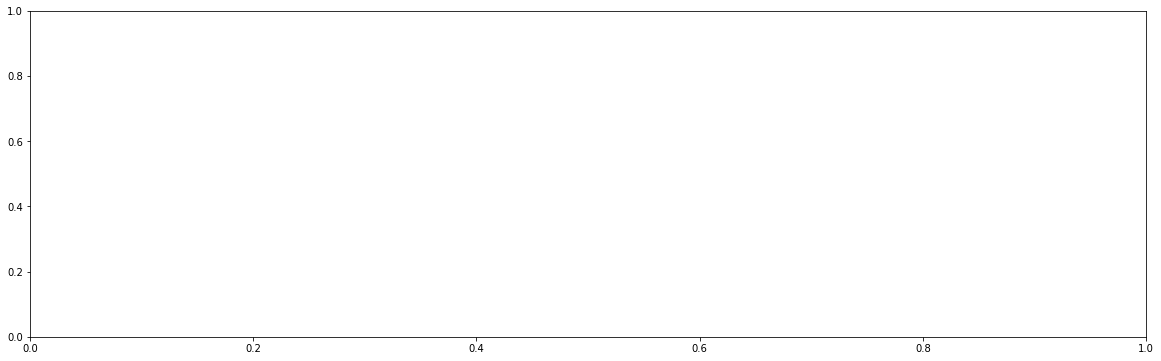

In [277]:
plt.figure(figsize = (20, 6))
#plt.subplot(1, 2, 1)
plt.scatter(X, y)
plt.xlabel('Class')
plt.ylabel('Iris Plant classification')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')

KeyError: "['sepal_length'] not in index"

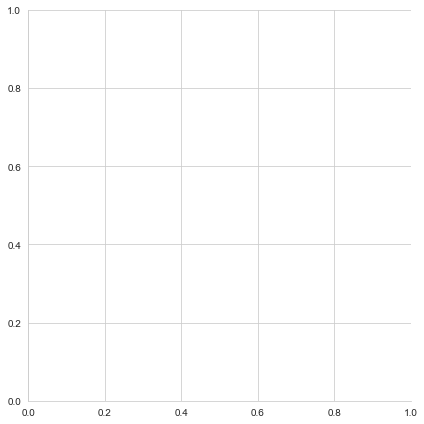

In [297]:

 
#iris = sns.load_dataset('iris')
 
# style used as a theme of graph
# for example if we want black
# graph with grid then write "darkgrid"
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="class",
              height = 6).map(plt.scatter, 'sepal_length', 'petal_length').add_legend()